1. 请用 python 的基本语句实现：
        
              计算 1+2+...+9999999
              
              对  n! 求和，其中 n = 1, ... 20 
              
              计算  1 + 1/2 + 1/3 + ... + 1/10000 

              判断 10000121 是否是质数
              
              求 100000 之内的质数
              
              输出所有的水仙花数 （水仙花数指一个 3 位数，各位数字的立方和等于数字本身。例如 153 = 1^3 + 5^3 + 3^3）
              
              请打印字符串： 
                  ha
                  haha
                  hahaha
                  hahahaha
                  ...
                  （最后一行有10个ha)
              
              对 1-100 按照它们的 sin 值大小排序；
              对排好序的数字，绘制 数字 VS sin(数字）的图像
        

2. 写一个通用的矩形法积分函数（参数：被积函数，上下限，切割成多少块）

    用它计算  sin, cos, exp 在 0-1 区间积分

3. 用蒙卡的方法计算 pi

    生成 N 个随机 2维 点，分布在中心为0，边长 2 的正方形内 (用 np.random.uniform(low, high, size) 生成)
    
    统计多少个点落在中心0,半径 1 的圆内
    
    利用数目的比值求出 pi
    
    绘制 N, pi估计值的关系曲线

4. 用 np.random.randint 生成 n 个长为 10 的list，存放 0-50 的整数 

    将他们合并之后，用 set 去重复，用 sort 排序
    
    将会有 m 个 0-50 整数没有被覆盖在里面，求出 m
    
    对 n = 1-40, 绘制 n, m 的曲线图

5. 请写一个函数，对一组输入的数，函数返回这些数的 sum、average、variance。
        （提示：python 的 return 语句可以返回多个对象）

6. 请自己写一个函数，计算两个随机变量的协方差 (输入为两个 list 或两个 array)

7. 请用 np.random.normal 函数随机生成 10^6 个 (mu=1, sigma=3) 的随机数，用 hist 函数画 100 bin 的统计直方图，看是不是你预期的结果。

       请你自己写的程序求出它们的 average 和 variance，看是不是你预期的。

8. 已知有随机变量 x, y, z ，且

        x 服从 标准正太分布；
    
        y = x + 另一个标准正太分布；
    
        z = (x-y)；
    
    请生成 100000 组 (x,y,z)
    
    由此计算 3*3 的协方差矩阵 (请分别用你自己写的协方差程序，以及 np.cov 函数计算，看结果是否一致)

9. 请生成 10 个 2*2 随机对称矩阵，用 numpy 的 eig 函数求特征值、特征向量；

    请以特征向量为主轴、特征值为轴长度，画椭圆。

10. 用 contourf 画一个环的彩色图

    用 fig.savefig 将它存储为 rings.png 文件
    
    使用 plt.imread 将该文件读入到 np.array 数组
    
    将该数组适当处理，生成一个分辨率低 8 倍，粗糙很多的图片

In [9]:
X, Y = np.linspace(-1,1,100), np.linspace(-1,1,100)
Z = np.meshgrid(X,Y)

Populating the interactive namespace from numpy and matplotlib


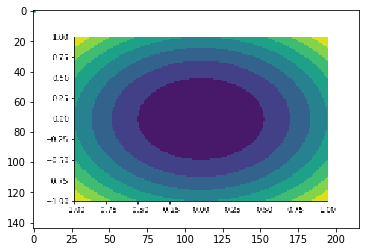

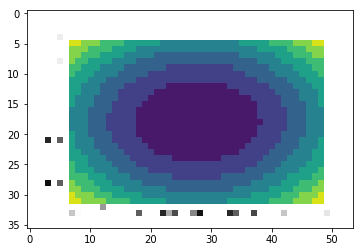

<Figure size 432x288 with 0 Axes>

In [56]:
%pylab inline
fig, ax = plt.subplots()
X, Y = np.linspace(-1,1,100), np.linspace(-1,1,100)
Z = [[x**2 + y**2  for y in Y] for x in X]; Z = np.array(Z)
ax.contourf(X, Y,Z)
fig.savefig('./rings.png',format='png')

data = plt.imread('rings.png')
#plt.imshow(data); plt.show()
plt.imshow((data[::2,::2,:]+data[0::2,0::2,:])*0.5); plt.show()
plt.imshow(data[::8,::8,:]); plt.show()
plt.savefig('./rings_lowres.png',format='png')

**(Little BOSS)**

请写一个随机行走搜索最小值的程序，能够自动调整步长（按当前行走的效率，自动调大、调小）。算法如下：
    
            任意 f(x), 任意步长 dx 开始，不断生成
                x2 = x + np.random.uniform(-dx, dx)
                    如果 f(x2)< f(x)， 则 x=x2，dx = dx*1.1
                    如果 f(x2)> f(x)， 则 dx = dx*0.9 继续行走。
            当 dx < 1.0e-6 时停止。
        
       请用这个算法搜索 (x-3)^2 的最小值。从 x=10, dx = 1 开始，看多少步能够停止。
       
       请画出 dx, x, 当前最小 f(x) 随步数的演化图。
       
       注意：对有多个参量的函数，也可以采用类似的方法搜索，此时可以借助 **梯度矢量** 找出当前最快的下降方向。
       
       相关的算法有 **随机梯度下降**， 在机器学习中有重要应用

**(Final BOSS)**

请在一个 npix*npix 像素的图片上生成 nregion 块不重叠的区域，用最少的颜色上色，验证四色猜想的成立。典型可取 npix=20, nregion=8。
     
         提示：
            
            要快速、有效地生成一系列形状不规则、互不重叠区域。
            生成完毕后，判断出哪些区域互为邻域。
            用递归搜索可能的着色方案。要很高效才能处理 nreigion >15。
            用 contourf 对格点阵列画图。
            
         本栋的程序30秒内实现： npix=300，nreigion<15 找到所有可能着色方案；nregion<35 找到至少一种方案。